In [16]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
#from urllib.request import urlretrieve
from scipy.integrate import odeint
import pandas as pd
import numpy as np
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
import sys
#import os

# Enable inline plotting
%matplotlib nbagg
%matplotlib inline

print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
#print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Numpy version 1.11.3
Pandas version 0.19.2
Matplotlib version 2.0.0


In [17]:
q = 1.
l = 1.


Дормула для подсчёта трека альфы:

$$\begin{cases}
 & \dot{\alpha} = \omega  \\ 
 & \dot{\omega}= \frac{5q^2\sin(\alpha)}{l^3} \left( \frac{1}{(5-4cos(\alpha))^{3/2}} + \frac{1}{(5+4sin(\alpha))^{3/2}} \right)  
\end{cases}$$

In [18]:
def fun(date, t):
	a = date[0]
	w = date[1]
	d = (w, 
         5*q**2 *sin(a)*(1/(l**3 *(4 *cos(a) + 5))**(3/2) + 1/(-l**3 *(4*cos(a) - 5))**(3/2)))
	return vstack(d).ravel()

CPU times: user 308 ms, sys: 4 ms, total: 312 ms
Wall time: 306 ms


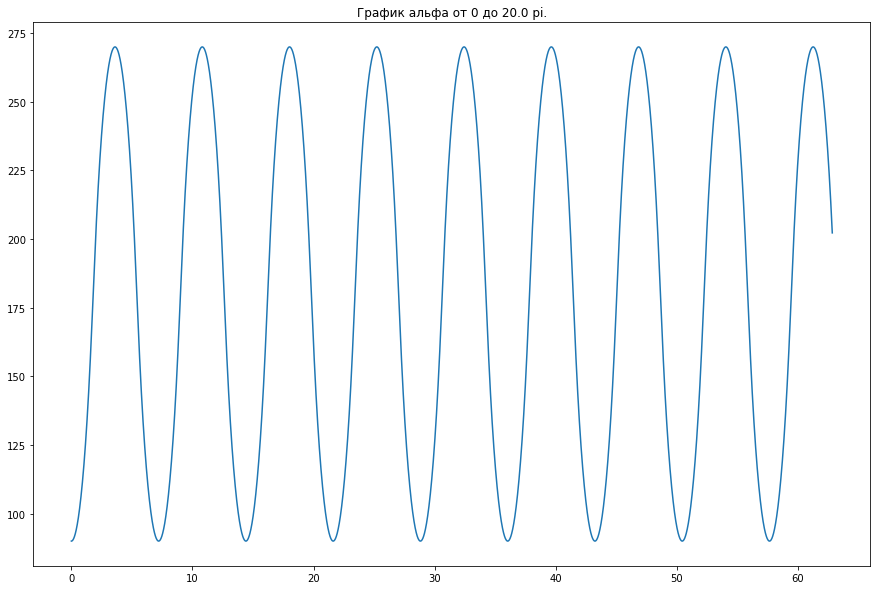

In [19]:
%%time

begin,end = 0,20*np.pi

t = linspace(begin,end, 10 ** 4)
date0 = array([np.pi/2,.0])

result = odeint(fun, date0, t)

plt.figure(figsize=(15,10))

plt.title('График альфа от {} до {} pi.'.format(round(begin,2),round(end/np.pi,2)))
plt.plot(t ,[i[0]/np.pi*180 for i in result])